## 2-mercaptopyridine

In [1]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_2-mercaptopyridine_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [2]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_2-mercaptopyridine_2_2-mercaptopyridine_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [93]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:26:34   -93768.717580        4.908416
FIRE:    1 16:26:34   -93770.090044        3.325478
FIRE:    2 16:26:34   -93770.611254        2.536693
FIRE:    3 16:26:35   -93770.764486        1.976132
FIRE:    4 16:26:35   -93770.969241        1.884212
FIRE:    5 16:26:35   -93771.115378        1.744468
FIRE:    6 16:26:35   -93771.178649        1.564350
FIRE:    7 16:26:35   -93771.223592        1.669859
FIRE:    8 16:26:35   -93771.312419        1.588640
FIRE:    9 16:26:35   -93771.445849        1.242420
FIRE:   10 16:26:35   -93771.587644        0.719711
FIRE:   11 16:26:36   -93771.669409        0.970026
FIRE:   12 16:26:36   -93771.702637        1.162881
FIRE:   13 16:26:36   -93771.715575        1.066131
FIRE:   14 16:26:36   -93771.737661        0.885248
FIRE:   15 16:26:36   -93771.762753        0.643655
FIRE:   16 16:26:36   -93771.784688        0.456329
FIRE:   17 16:26:36   -93771.799777        0.486595
FIRE:   18 16:

In [94]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:26:39   -93798.741865        5.661514
FIRE:    1 16:26:39   -93800.047337        3.113028
FIRE:    2 16:26:39   -93800.412661        2.809483
FIRE:    3 16:26:39   -93800.552977        2.167622
FIRE:    4 16:26:39   -93800.729170        1.166334
FIRE:    5 16:26:39   -93800.832479        0.892531
FIRE:    6 16:26:39   -93800.849264        1.403445
FIRE:    7 16:26:39   -93800.858255        1.330606
FIRE:    8 16:26:39   -93800.874885        1.191152
FIRE:    9 16:26:40   -93800.896792        0.997404
FIRE:   10 16:26:40   -93800.921133        0.813022
FIRE:   11 16:26:40   -93800.945265        0.769763
FIRE:   12 16:26:40   -93800.967481        0.810345
FIRE:   13 16:26:40   -93800.987505        0.863171
FIRE:   14 16:26:40   -93801.008440        0.896445
FIRE:   15 16:26:40   -93801.032703        0.894880
FIRE:   16 16:26:40   -93801.063596        0.850449
FIRE:   17 16:26:40   -93801.103466        0.769572
FIRE:   18 16:

In [95]:
# Define the H2 molecule (A standard bond length for H2 is ~0.74 Å)
h2_molecule = Atoms("H2", positions=[[0, 0, 0], [0.74, 0, 0]])
h2_molecule.calc = calc

# Relax the H2 molecule
opt_h2 = FIRE(h2_molecule)
# Use a high fmax and fewer steps as H2 relaxation is fast
opt_h2.run(fmax=0.01, steps=100) 

E_H2 = h2_molecule.get_potential_energy()
E_H = 0.5 * E_H2
print(f"Isolated H atom energy: {E_H:.3f} eV")

      Step     Time          Energy          fmax
FIRE:    0 16:26:48      -31.589716        0.047594
FIRE:    1 16:26:48      -31.589744        0.012353
FIRE:    2 16:26:48      -31.589733        0.031727
FIRE:    3 16:26:48      -31.589737        0.025916
FIRE:    4 16:26:48      -31.589743        0.015339
FIRE:    5 16:26:48      -31.589746        0.001920
Isolated H atom energy: -15.795 eV


In [96]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.205 eV


## 2benezenedithiol

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_12benezenedithiol_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_12benezenedithiol_2_12benezenedithiol_protonated_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [22]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -4,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:36:52  -124906.967922        1.312414
FIRE:    1 15:36:52  -124907.100072        1.034213
FIRE:    2 15:36:52  -124907.124140        1.052914
FIRE:    3 15:36:52  -124907.160995        0.853491
FIRE:    4 15:36:52  -124907.205178        0.857795
FIRE:    5 15:36:52  -124907.229243        0.853181
FIRE:    6 15:36:52  -124907.240091        0.828091
FIRE:    7 15:36:52  -124907.264054        0.833854
FIRE:    8 15:36:52  -124907.309145        0.699149
FIRE:    9 15:36:52  -124907.358331        0.594381
FIRE:   10 15:36:52  -124907.394312        0.450924
FIRE:   11 15:36:53  -124907.421041        0.629711
FIRE:   12 15:36:53  -124907.462659        0.524619
FIRE:   13 15:36:53  -124907.503616        0.304453
FIRE:   14 15:36:53  -124907.524137        0.532825
FIRE:   15 15:36:53  -124907.559852        0.524633
FIRE:   16 15:36:53  -124907.595224        0.596253
FIRE:   17 15:36:53  -124907.639745        0.501607
FIRE:   18 15:

In [23]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -4})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:37:05  -124936.703023        5.723419
FIRE:    1 15:37:05  -124937.466796        2.652478
FIRE:    2 15:37:05  -124937.473676        4.139510
FIRE:    3 15:37:05  -124937.643161        3.349126
FIRE:    4 15:37:06  -124937.845449        1.908151
FIRE:    5 15:37:06  -124937.930907        1.092266
FIRE:    6 15:37:06  -124937.936918        1.089611
FIRE:    7 15:37:06  -124937.948196        1.084309
FIRE:    8 15:37:06  -124937.963577        1.076348
FIRE:    9 15:37:06  -124937.981620        1.065720
FIRE:   10 15:37:06  -124938.001308        1.052398
FIRE:   11 15:37:06  -124938.022101        1.036429
FIRE:   12 15:37:06  -124938.044251        1.017959
FIRE:   13 15:37:07  -124938.070987        0.994961
FIRE:   14 15:37:07  -124938.104070        0.966923
FIRE:   15 15:37:07  -124938.144746        0.933422
FIRE:   16 15:37:07  -124938.192952        0.894194
FIRE:   17 15:37:07  -124938.246960        0.849249
FIRE:   18 15:

In [24]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: -1.414 eV


## 2Mercapto6methylpyridine

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_2Mercapto6methylpyridine_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_2Mercapto6methylpyridine_2_2Mercapto6methylpyridine_pro_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [27]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:41:33   -96978.405830        3.419178
FIRE:    1 15:41:33   -96978.860230        2.296977
FIRE:    2 15:41:33   -96979.223000        2.117993
FIRE:    3 15:41:33   -96979.658825        1.662455
FIRE:    4 15:41:33   -96979.886965        1.938619
FIRE:    5 15:41:33   -96980.129456        1.431022
FIRE:    6 15:41:33   -96980.306956        1.327032
FIRE:    7 15:41:33   -96980.409714        1.058458
FIRE:    8 15:41:33   -96980.437748        0.842938
FIRE:    9 15:41:33   -96980.480550        0.658076
FIRE:   10 15:41:33   -96980.522886        0.631166
FIRE:   11 15:41:33   -96980.559820        0.617090
FIRE:   12 15:41:33   -96980.596895        0.638986
FIRE:   13 15:41:34   -96980.638697        0.653572
FIRE:   14 15:41:34   -96980.682245        0.546353
FIRE:   15 15:41:34   -96980.725749        0.454607
FIRE:   16 15:41:34   -96980.767790        0.602846
FIRE:   17 15:41:34   -96980.813639        0.538722
FIRE:   18 15:

In [28]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:42:04   -97008.283337        8.811893
FIRE:    1 15:42:04   -97009.610388        3.617902
FIRE:    2 15:42:05   -97009.473635        7.502388
FIRE:    3 15:42:05   -97009.792171        5.807979
FIRE:    4 15:42:05   -97010.107814        3.053436
FIRE:    5 15:42:05   -97010.166268        1.697571
FIRE:    6 15:42:05   -97010.178863        1.570661
FIRE:    7 15:42:05   -97010.201086        1.419596
FIRE:    8 15:42:05   -97010.227939        1.303673
FIRE:    9 15:42:05   -97010.253986        1.156014
FIRE:   10 15:42:05   -97010.275336        0.984236
FIRE:   11 15:42:05   -97010.291384        0.802669
FIRE:   12 15:42:06   -97010.304978        0.877394
FIRE:   13 15:42:06   -97010.322057        1.089193
FIRE:   14 15:42:06   -97010.347100        1.113937
FIRE:   15 15:42:06   -97010.381738        0.947694
FIRE:   16 15:42:06   -97010.422241        0.796371
FIRE:   17 15:42:06   -97010.461733        0.679817
FIRE:   18 15:

In [29]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.299 eV


## 2Mercaptonicotinic_acid

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_2Mercaptonicotinic_acid_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_2Mercaptonicotinic_acid_2_2Mercaptonicotinic_acid_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [38]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=300)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:49:37  -109109.052073        8.273496
FIRE:    1 15:49:37  -109111.631135        5.502588
FIRE:    2 15:49:37  -109112.741428        2.765439
FIRE:    3 15:49:37  -109113.320241        1.994595
FIRE:    4 15:49:37  -109113.612812        2.665557
FIRE:    5 15:49:37  -109113.698086        2.441759
FIRE:    6 15:49:37  -109113.840171        2.015928
FIRE:    7 15:49:37  -109113.997796        1.427650
FIRE:    8 15:49:38  -109114.138047        1.068665
FIRE:    9 15:49:38  -109114.248626        1.107746
FIRE:   10 15:49:38  -109114.335459        1.054365
FIRE:   11 15:49:38  -109114.411755        1.410197
FIRE:   12 15:49:38  -109114.497897        1.794080
FIRE:   13 15:49:38  -109114.605134        1.802442
FIRE:   14 15:49:38  -109114.742939        1.333737
FIRE:   15 15:49:38  -109114.908392        0.806762
FIRE:   16 15:49:38  -109115.077031        0.766014
FIRE:   17 15:49:38  -109115.229675        1.240014
FIRE:   18 15:

In [39]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=300)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:50:01  -109139.911483       11.585221
FIRE:    1 15:50:02  -109143.212050        7.006732
FIRE:    2 15:50:02  -109144.223449        3.220598
FIRE:    3 15:50:02  -109144.426704        2.487725
FIRE:    4 15:50:02  -109144.678185        2.422845
FIRE:    5 15:50:02  -109144.853297        2.312189
FIRE:    6 15:50:02  -109144.987301        2.165381
FIRE:    7 15:50:02  -109145.180629        2.061551
FIRE:    8 15:50:02  -109145.439910        1.880154
FIRE:    9 15:50:02  -109145.682441        1.770796
FIRE:   10 15:50:02  -109145.874277        1.626373
FIRE:   11 15:50:03  -109146.060138        1.602773
FIRE:   12 15:50:03  -109146.295074        1.438771
FIRE:   13 15:50:03  -109146.528531        1.396418
FIRE:   14 15:50:03  -109146.740680        1.230747
FIRE:   15 15:50:03  -109146.897274        1.348122
FIRE:   16 15:50:03  -109146.924567        1.089739
FIRE:   17 15:50:03  -109146.965679        0.753979
FIRE:   18 15:

## Failed structure optimization!! The adsorped hydrogen flew off

## 3_Bromopyridine_thione

In [3]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_3_Bromopyridine_thione_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_3_Bromopyridine_thione_2_3_Bromopyridine_thione_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [58]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:03:13  -303848.729550        4.692532
FIRE:    1 16:03:13  -303849.477643        3.058014
FIRE:    2 16:03:13  -303849.903343        3.382117
FIRE:    3 16:03:13  -303850.386026        2.075132
FIRE:    4 16:03:13  -303850.511940        2.771285
FIRE:    5 16:03:13  -303850.591147        2.274606
FIRE:    6 16:03:13  -303850.691449        1.373653
FIRE:    7 16:03:13  -303850.754658        1.233411
FIRE:    8 16:03:14  -303850.785110        1.497737
FIRE:    9 16:03:14  -303850.823775        1.433794
FIRE:   10 16:03:14  -303850.874604        1.025035
FIRE:   11 16:03:14  -303850.907278        0.800413
FIRE:   12 16:03:14  -303850.916909        1.188995
FIRE:   13 16:03:14  -303850.923194        1.135742
FIRE:   14 16:03:14  -303850.934446        1.034302
FIRE:   15 16:03:14  -303850.948449        0.895307
FIRE:   16 16:03:14  -303850.962838        0.736159
FIRE:   17 16:03:14  -303850.975955        0.583037
FIRE:   18 16:

In [59]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:03:17  -303878.335915        7.118041
FIRE:    1 16:03:17  -303879.785798        4.137351
FIRE:    2 16:03:17  -303879.761984        6.597456
FIRE:    3 16:03:17  -303880.091172        5.043889
FIRE:    4 16:03:18  -303880.397617        2.565153
FIRE:    5 16:03:18  -303880.427559        1.621337
FIRE:    6 16:03:18  -303880.442266        1.521438
FIRE:    7 16:03:18  -303880.468120        1.445636
FIRE:    8 16:03:18  -303880.499144        1.345699
FIRE:    9 16:03:18  -303880.528819        1.221025
FIRE:   10 16:03:18  -303880.552469        1.080515
FIRE:   11 16:03:18  -303880.569284        0.939142
FIRE:   12 16:03:18  -303880.582708        0.928361
FIRE:   13 16:03:18  -303880.599565        1.133216
FIRE:   14 16:03:19  -303880.625265        1.166334
FIRE:   15 16:03:19  -303880.661909        0.992254
FIRE:   16 16:03:19  -303880.705030        0.774624
FIRE:   17 16:03:19  -303880.745408        0.593740
FIRE:   18 16:

In [60]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.534 eV


## 3-Bromo-6-mercaptopyridine

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_3-Bromo-6-mercaptopyridine_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_3-Bromo-6-mercaptopyridine_2_3-Bromo-6-mercaptopyridineproton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [66]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:06:11  -303844.478430       10.897431
FIRE:    1 16:06:11  -303847.476189        6.189270
FIRE:    2 16:06:11  -303848.774415        2.767558
FIRE:    3 16:06:11  -303849.270352        1.838738
FIRE:    4 16:06:11  -303849.248831        1.686181
FIRE:    5 16:06:11  -303849.317507        1.580134
FIRE:    6 16:06:11  -303849.423766        1.443301
FIRE:    7 16:06:11  -303849.533364        1.235197
FIRE:    8 16:06:11  -303849.635625        0.986659
FIRE:    9 16:06:12  -303849.735131        0.864820
FIRE:   10 16:06:12  -303849.826681        0.714305
FIRE:   11 16:06:12  -303849.900339        0.719395
FIRE:   12 16:06:12  -303849.969778        0.945968
FIRE:   13 16:06:12  -303850.054169        1.009917
FIRE:   14 16:06:12  -303850.155257        1.116730
FIRE:   15 16:06:12  -303850.264973        0.991530
FIRE:   16 16:06:12  -303850.413866        0.719945
FIRE:   17 16:06:12  -303850.587206        0.623842
FIRE:   18 16:

In [67]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:06:21  -303874.383047       12.651728
FIRE:    1 16:06:21  -303877.741582        5.732002
FIRE:    2 16:06:22  -303878.813705        2.898757
FIRE:    3 16:06:22  -303878.801423        7.988272
FIRE:    4 16:06:22  -303879.106331        5.644269
FIRE:    5 16:06:22  -303879.418495        2.274630
FIRE:    6 16:06:22  -303879.518262        1.973079
FIRE:    7 16:06:22  -303879.528528        1.908001
FIRE:    8 16:06:22  -303879.547586        1.780390
FIRE:    9 16:06:22  -303879.572870        1.595959
FIRE:   10 16:06:22  -303879.601363        1.365211
FIRE:   11 16:06:23  -303879.630415        1.106438
FIRE:   12 16:06:23  -303879.658562        0.851143
FIRE:   13 16:06:23  -303879.685921        0.840476
FIRE:   14 16:06:23  -303879.716854        1.102320
FIRE:   15 16:06:23  -303879.754042        1.251794
FIRE:   16 16:06:23  -303879.799851        1.226231
FIRE:   17 16:06:23  -303879.854223        0.980314
FIRE:   18 16:

In [68]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.162 eV


## 3Aminopyridine_thione

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_3Aminopyridine_thione_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_3Aminopyridine_thione_2_3Aminopyridine_thione_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [71]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:09:35   -98284.698284       11.033808
FIRE:    1 16:09:35   -98287.768247        6.236835
FIRE:    2 16:09:35   -98289.093966        2.622469
FIRE:    3 16:09:35   -98289.519927        1.531841
FIRE:    4 16:09:35   -98289.566594        1.301204
FIRE:    5 16:09:35   -98289.636950        1.001828
FIRE:    6 16:09:35   -98289.706657        0.829918
FIRE:    7 16:09:35   -98289.769958        0.814977
FIRE:    8 16:09:35   -98289.835401        0.807482
FIRE:    9 16:09:36   -98289.907396        0.748950
FIRE:   10 16:09:36   -98289.981342        0.612252
FIRE:   11 16:09:36   -98290.061578        0.759171
FIRE:   12 16:09:36   -98290.154057        0.840104
FIRE:   13 16:09:36   -98290.265862        0.787855
FIRE:   14 16:09:36   -98290.392807        0.589373
FIRE:   15 16:09:36   -98290.532952        0.506480
FIRE:   16 16:09:36   -98290.679969        0.559174
FIRE:   17 16:09:36   -98290.826562        0.442368
FIRE:   18 16:

In [72]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:09:43   -98314.716575       12.620831
FIRE:    1 16:09:43   -98318.142627        5.801562
FIRE:    2 16:09:43   -98319.244043        3.540395
FIRE:    3 16:09:43   -98319.246648        7.466839
FIRE:    4 16:09:43   -98319.518431        5.678697
FIRE:    5 16:09:43   -98319.826042        3.056979
FIRE:    6 16:09:44   -98319.965733        1.909932
FIRE:    7 16:09:44   -98319.946437        2.769483
FIRE:    8 16:09:44   -98319.967521        2.674075
FIRE:    9 16:09:44   -98320.005453        2.485740
FIRE:   10 16:09:44   -98320.052776        2.211225
FIRE:   11 16:09:44   -98320.100709        1.865918
FIRE:   12 16:09:44   -98320.141542        1.484324
FIRE:   13 16:09:44   -98320.171234        1.145704
FIRE:   14 16:09:44   -98320.191409        1.072343
FIRE:   15 16:09:44   -98320.210214        1.632537
FIRE:   16 16:09:45   -98320.236743        2.002424
FIRE:   17 16:09:45   -98320.280010        2.072182
FIRE:   18 16:

In [73]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 0.680 eV


## 5-Chloropyridine-2-thiol

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_5-Chloropyridine-2-thiol_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_5-Chloropyridine-2-thiol_2_5-Chloropyridine-2-thiol_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [100]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:30:58  -131288.530102        4.825400
FIRE:    1 16:30:58  -131289.315256        2.909800
FIRE:    2 16:30:58  -131289.692620        3.525968
FIRE:    3 16:30:58  -131289.842535        2.483556
FIRE:    4 16:30:59  -131290.006938        1.914238
FIRE:    5 16:30:59  -131290.092104        1.775619
FIRE:    6 16:30:59  -131290.145543        1.602242
FIRE:    7 16:30:59  -131290.243229        1.521373
FIRE:    8 16:30:59  -131290.379917        1.120989
FIRE:    9 16:30:59  -131290.494868        0.892571
FIRE:   10 16:30:59  -131290.569788        1.121352
FIRE:   11 16:30:59  -131290.652531        1.342388
FIRE:   12 16:30:59  -131290.760816        1.024369
FIRE:   13 16:30:59  -131290.830309        0.937822
FIRE:   14 16:31:00  -131290.918558        1.178624
FIRE:   15 16:31:00  -131291.046224        0.778129
FIRE:   16 16:31:00  -131291.133660        0.977331
FIRE:   17 16:31:00  -131291.258638        0.628913
FIRE:   18 16:

In [101]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:31:03  -131318.195813        6.708294
FIRE:    1 16:31:03  -131319.732569        4.262966
FIRE:    2 16:31:03  -131319.684056        5.681385
FIRE:    3 16:31:03  -131320.024340        4.323345
FIRE:    4 16:31:03  -131320.356776        2.134747
FIRE:    5 16:31:03  -131320.412204        1.914854
FIRE:    6 16:31:04  -131320.425438        1.789680
FIRE:    7 16:31:04  -131320.449008        1.547602
FIRE:    8 16:31:04  -131320.477906        1.206511
FIRE:    9 16:31:04  -131320.506570        1.013232
FIRE:   10 16:31:04  -131320.530721        0.900737
FIRE:   11 16:31:04  -131320.549218        0.780357
FIRE:   12 16:31:04  -131320.564621        0.829176
FIRE:   13 16:31:04  -131320.583224        0.942976
FIRE:   14 16:31:04  -131320.610144        0.990007
FIRE:   15 16:31:04  -131320.647890        0.941693
FIRE:   16 16:31:05  -131320.692916        0.775164
FIRE:   17 16:31:05  -131320.736386        0.488629
FIRE:   18 16:

In [102]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.343 eV


## 6-Mercaptonicotinonitrile

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_6-Mercaptonicotinonitrile_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_6-Mercaptonicotinonitrile_2_6-Mercaptonicotinonitrile_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [83]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:16:30  -101298.047614       10.797407
FIRE:    1 16:16:30  -101300.973955        6.170556
FIRE:    2 16:16:30  -101302.244239        2.748815
FIRE:    3 16:16:31  -101302.758960        2.041777
FIRE:    4 16:16:31  -101302.772981        1.777246
FIRE:    5 16:16:31  -101302.847745        1.537549
FIRE:    6 16:16:31  -101302.950771        1.410278
FIRE:    7 16:16:31  -101303.051599        1.211689
FIRE:    8 16:16:31  -101303.152814        1.059598
FIRE:    9 16:16:31  -101303.254968        0.907927
FIRE:   10 16:16:31  -101303.350489        0.720168
FIRE:   11 16:16:31  -101303.427951        0.670637
FIRE:   12 16:16:32  -101303.491732        0.857803
FIRE:   13 16:16:32  -101303.572620        0.993384
FIRE:   14 16:16:32  -101303.671703        1.107423
FIRE:   15 16:16:32  -101303.781327        1.004313
FIRE:   16 16:16:32  -101303.929083        0.702061
FIRE:   17 16:16:32  -101304.091678        0.645656
FIRE:   18 16:

In [84]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:16:38  -101327.248408       12.540579
FIRE:    1 16:16:38  -101330.890560        6.394595
FIRE:    2 16:16:38  -101331.921954       11.184290
FIRE:    3 16:16:38  -101332.370561        3.405177
FIRE:    4 16:16:38  -101332.514207        5.158440
FIRE:    5 16:16:38  -101332.551362        4.665340
FIRE:    6 16:16:38  -101332.614135        3.685952
FIRE:    7 16:16:39  -101332.683779        2.270938
FIRE:    8 16:16:39  -101332.743649        1.991376
FIRE:    9 16:16:39  -101332.791568        3.002228
FIRE:   10 16:16:39  -101332.842197        3.958706
FIRE:   11 16:16:39  -101332.910561        4.000896
FIRE:   12 16:16:39  -101333.005615        3.000438
FIRE:   13 16:16:39  -101333.108791        1.317544
FIRE:   14 16:16:39  -101333.196916        1.766740
FIRE:   15 16:16:39  -101333.281734        2.529369
FIRE:   16 16:16:40  -101333.390079        1.964783
FIRE:   17 16:16:40  -101333.499596        0.625261
FIRE:   18 16:

In [85]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.355 eV


## 8Mercaptoquinoline

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_8-Mercaptoquinoline_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_8-Mercaptoquinoline_2_8-Mercaptoquinoline_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [88]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:23:30  -106313.815577        2.596211
FIRE:    1 16:23:30  -106314.194029        0.876416
FIRE:    2 16:23:30  -106314.091003        2.159850
FIRE:    3 16:23:30  -106314.192644        1.522939
FIRE:    4 16:23:30  -106314.301593        0.667804
FIRE:    5 16:23:30  -106314.331921        0.646838
FIRE:    6 16:23:30  -106314.334837        0.613078
FIRE:    7 16:23:30  -106314.340171        0.547762
FIRE:    8 16:23:30  -106314.347105        0.464627
FIRE:    9 16:23:30  -106314.354686        0.408556
FIRE:   10 16:23:30  -106314.362206        0.380768
FIRE:   11 16:23:31  -106314.369395        0.367141
FIRE:   12 16:23:31  -106314.376515        0.366753
FIRE:   13 16:23:31  -106314.385030        0.371847
FIRE:   14 16:23:31  -106314.395911        0.369891
FIRE:   15 16:23:31  -106314.409853        0.346953
FIRE:   16 16:23:31  -106314.426591        0.333404
FIRE:   17 16:23:31  -106314.444808        0.328257
FIRE:   18 16:

In [89]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 16:23:35  -106341.807592        5.799120
FIRE:    1 16:23:35  -106342.825050        2.343377
FIRE:    2 16:23:35  -106342.808038        4.657825
FIRE:    3 16:23:35  -106343.045568        3.528700
FIRE:    4 16:23:36  -106343.298566        1.671458
FIRE:    5 16:23:36  -106343.373277        1.191195
FIRE:    6 16:23:36  -106343.381524        1.174669
FIRE:    7 16:23:36  -106343.396813        1.143875
FIRE:    8 16:23:36  -106343.417082        1.103042
FIRE:    9 16:23:36  -106343.440047        1.057771
FIRE:   10 16:23:36  -106343.463873        1.013819
FIRE:   11 16:23:36  -106343.487855        0.975798
FIRE:   12 16:23:36  -106343.512548        0.945757
FIRE:   13 16:23:37  -106343.542184        0.920822
FIRE:   14 16:23:37  -106343.579375        0.899556
FIRE:   15 16:23:37  -106343.626097        0.879299
FIRE:   16 16:23:37  -106343.682042        0.857994
FIRE:   17 16:23:37  -106343.744350        0.834404
FIRE:   18 16:

In [90]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.382 eV


## Catechol

In [ ]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_catechol_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [ ]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_catechol_2_catechol_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [15]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -4,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:28:10   -72177.063738        2.127830
FIRE:    1 15:28:10   -72177.250195        0.722545
FIRE:    2 15:28:10   -72177.228616        1.447042
FIRE:    3 15:28:10   -72177.266981        1.058314
FIRE:    4 15:28:10   -72177.310575        0.449761
FIRE:    5 15:28:11   -72177.326846        0.497610
FIRE:    6 15:28:11   -72177.328119        0.472914
FIRE:    7 15:28:11   -72177.330521        0.425459
FIRE:    8 15:28:11   -72177.333689        0.359206
FIRE:    9 15:28:11   -72177.337242        0.312201
FIRE:   10 15:28:11   -72177.340922        0.311999
FIRE:   11 15:28:11   -72177.344559        0.311938
FIRE:   12 15:28:11   -72177.348256        0.310301
FIRE:   13 15:28:11   -72177.352629        0.304504
FIRE:   14 15:28:11   -72177.358062        0.302039
FIRE:   15 15:28:12   -72177.364838        0.288638
FIRE:   16 15:28:12   -72177.372888        0.240391
FIRE:   17 15:28:12   -72177.381676        0.205016
FIRE:   18 15:

In [16]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -4})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 15:28:39   -72208.208482        5.227011
FIRE:    1 15:28:39   -72208.816086        2.277790
FIRE:    2 15:28:39   -72208.646242        8.067596
FIRE:    3 15:28:39   -72208.906236        4.171992
FIRE:    4 15:28:39   -72209.051777        1.056026
FIRE:    5 15:28:39   -72208.997348        3.053187
FIRE:    6 15:28:39   -72209.010146        2.858522
FIRE:    7 15:28:39   -72209.032874        2.471302
FIRE:    8 15:28:40   -72209.060392        1.899395
FIRE:    9 15:28:40   -72209.086292        1.235704
FIRE:   10 15:28:40   -72209.104516        0.945556
FIRE:   11 15:28:40   -72209.111976        0.908836
FIRE:   12 15:28:40   -72209.111523        1.420876
FIRE:   13 15:28:40   -72209.112260        1.392043
FIRE:   14 15:28:40   -72209.113661        1.335234
FIRE:   15 15:28:40   -72209.115690        1.252189
FIRE:   16 15:28:40   -72209.118188        1.145566
FIRE:   17 15:28:40   -72209.121028        1.018725
FIRE:   18 15:

In [17]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: -0.526 eV


## 8-quinolinol

In [136]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_8--quinolinol_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
# view(complex_atoms, viewer='x3d')

In [137]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_8--quinolinol_2_8--quinolinol_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
# view(complex_hydride_atoms, viewer='x3d')

In [122]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": -1,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 17:25:55   -79948.970484        3.329762
FIRE:    1 17:25:55   -79949.526068        1.839379
FIRE:    2 17:25:55   -79949.543411        2.877164
FIRE:    3 17:25:56   -79949.677974        2.007163
FIRE:    4 17:25:56   -79949.827598        1.359210
FIRE:    5 17:25:56   -79949.885966        1.246817
FIRE:    6 17:25:56   -79949.890912        1.229397
FIRE:    7 17:25:56   -79949.900169        1.196027
FIRE:    8 17:25:56   -79949.912632        1.149570
FIRE:    9 17:25:56   -79949.927034        1.093896
FIRE:   10 17:25:56   -79949.942297        1.033271
FIRE:   11 17:25:56   -79949.957873        0.971216
FIRE:   12 17:25:56   -79949.973804        0.909320
FIRE:   13 17:25:57   -79949.992407        0.840197
FIRE:   14 17:25:57   -79950.014749        0.760141
FIRE:   15 17:25:57   -79950.041489        0.665660
FIRE:   16 17:25:57   -79950.071998        0.559002
FIRE:   17 17:25:57   -79950.104318        0.453630
FIRE:   18 17:

In [123]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": -1})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 17:26:00   -79977.094293        9.285265
FIRE:    1 17:26:00   -79978.790476        2.135439
FIRE:    2 17:26:01   -79977.497005       20.711718
FIRE:    3 17:26:01   -79978.923911        5.984227
FIRE:    4 17:26:01   -79979.165218        3.883013
FIRE:    5 17:26:01   -79979.189436        3.628420
FIRE:    6 17:26:01   -79979.232730        3.147519
FIRE:    7 17:26:01   -79979.285614        2.479041
FIRE:    8 17:26:01   -79979.336182        1.594164
FIRE:    9 17:26:01   -79979.373427        1.023151
FIRE:   10 17:26:01   -79979.392509        1.191472
FIRE:   11 17:26:02   -79979.400199        2.179955
FIRE:   12 17:26:02   -79979.402122        2.125884
FIRE:   13 17:26:02   -79979.405841        2.019784
FIRE:   14 17:26:02   -79979.411113        1.865864
FIRE:   15 17:26:02   -79979.417605        1.670110
FIRE:   16 17:26:02   -79979.424932        1.440334
FIRE:   17 17:26:02   -79979.432739        1.185909
FIRE:   18 17:

In [124]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - 2*E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.904 eV


## bathophenanthroline

In [132]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_batho-phen_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
# view(complex_atoms, viewer='x3d')

In [135]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_batho-phen_2_batho-phen_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

## This structure is overcoordinated. I can't see the hydrogen adsorped

## 4-5_dimethyl1-2phenylenediamine

In [8]:
from ase.io import read
from ase.visualize import view
xyz_path_complex = 'complexes_modified_structures_bidentate_3/ni_oct_2_4-5_dimethyl1-2-phenylenediamine_3_s_1_conf_1.xyz'
complex_atoms = read(xyz_path_complex)
view(complex_atoms, viewer='x3d')

In [10]:
xyz_path = 'complexes_modified_structures_bidentate_3/ni_oct_2_4-5_dimethyl1-2-phenylenediamine_2_4-5_dimethyl1-2-phenylenediamine_proton_1_hydride_1_s_1_conf_1.xyz'
complex_hydride_atoms = read(xyz_path)
view(complex_hydride_atoms, viewer='x3d')

In [11]:
from ase import Atoms
from ase.optimize import FIRE
from ase.constraints import FixAtoms, FixCartesian
from fairchem.core import pretrained_mlip, FAIRChemCalculator
from ase.io import write
import numpy as np

# --- Step 1: Initialize FairChem calculator ---
predictor = pretrained_mlip.get_predict_unit("uma-s-1p1", device="cuda")
calc = FAIRChemCalculator(predictor, task_name="omol")
complex_atoms.info.update({"charge": +2,})
complex_atoms.calc = calc
# --- Step 2: Relax the complex ---
opt = FIRE(complex_atoms)
opt.run(fmax=0.1, steps=200)
E_complex = complex_atoms.get_potential_energy()
print(f"Relaxed complex energy: {E_complex:.3f} eV")
view(complex_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 20:38:37   -75426.832599        7.047808
FIRE:    1 20:38:37   -75429.242019        5.448740
FIRE:    2 20:38:37   -75431.390308        4.334718
FIRE:    3 20:38:37   -75433.059829        3.497623
FIRE:    4 20:38:37   -75434.431249        2.885879
FIRE:    5 20:38:37   -75435.633942        2.421248
FIRE:    6 20:38:37   -75436.722721        2.022441
FIRE:    7 20:38:37   -75437.711005        1.866005
FIRE:    8 20:38:37   -75438.608175        1.919359
FIRE:    9 20:38:38   -75439.429436        1.832808
FIRE:   10 20:38:38   -75440.187447        2.045904
FIRE:   11 20:38:38   -75440.872046        2.124293
FIRE:   12 20:38:38   -75441.463194        1.943004
FIRE:   13 20:38:38   -75441.953183        1.573728
FIRE:   14 20:38:38   -75442.352546        1.087612
FIRE:   15 20:38:38   -75442.685142        1.025751
FIRE:   16 20:38:38   -75442.972208        1.124369
FIRE:   17 20:38:38   -75443.224050        1.000026
FIRE:   18 20:

In [12]:
# --- Step 3: Energy of complex + Hydride ---
opt_ads = FIRE(complex_hydride_atoms)
complex_hydride_atoms.info.update({"charge": +2})
complex_hydride_atoms.calc = calc
opt_ads.run(fmax=0.1, steps=200)
E_complex_hydride_atoms = complex_hydride_atoms.get_potential_energy()
print(f"Relaxed complex + hydride energy: {E_complex_hydride_atoms:.3f} eV")
view(complex_hydride_atoms, viewer='x3d')

      Step     Time          Energy          fmax
FIRE:    0 20:38:45   -75442.797157       11.501123
FIRE:    1 20:38:45   -75446.183630        5.220680
FIRE:    2 20:38:45   -75447.861674        3.639760
FIRE:    3 20:38:45   -75448.757571        4.073444
FIRE:    4 20:38:46   -75449.345530        5.408036
FIRE:    5 20:38:46   -75449.981371        3.638606
FIRE:    6 20:38:46   -75450.509859        2.736263
FIRE:    7 20:38:46   -75450.933794        3.565334
FIRE:    8 20:38:46   -75451.403936        2.981318
FIRE:    9 20:38:46   -75451.967573        1.991527
FIRE:   10 20:38:46   -75452.576380        2.571186
FIRE:   11 20:38:46   -75453.221027        2.185758
FIRE:   12 20:38:46   -75453.791065        1.595773
FIRE:   13 20:38:46   -75454.291731        1.725640
FIRE:   14 20:38:47   -75454.698378        1.173108
FIRE:   15 20:38:47   -75454.973238        1.752417
FIRE:   16 20:38:47   -75455.317247        1.813979
FIRE:   17 20:38:47   -75455.660576        1.287939
FIRE:   18 20:

In [15]:
# --- Step 6: Compute adsorption energy ---
E_ads = (E_complex_hydride_atoms) - E_complex - E_H
print(f"Adsorption energy of H on Ni: {E_ads:.3f} eV")

Adsorption energy of H on Ni: 1.310 eV


## Aggregate Results

In [179]:
import pandas as pd 
df = pd.read_csv("TOF_calc.csv")
df.query("`Ligand Name` == '4,5 dimethyl 1,2 phenylene diamine' & `umol catalyst` == 0.1000")['TOF (1/min)']

218    0.001596
Name: TOF (1/min), dtype: float64

In [183]:
## Adsorption energies (eV)
adsorption_energies = {
    "2-mercaptopyridine":1.205, 
    "1-2benezenedithiol":-1.414,
    "2mercapto_6_methylpyridine":1.299,
    "3-Bromopyridine-2(1H)-thione":1.534,
    "3_bromo_6_mercaptopyridine":1.162,
    "3-Aminopyridine-2(1H)-thione":0.680,
    "5-chloropyridine_2_thiol":1.343,
    "6_mercaptonicotinonitrile":1.355,
    "8-Mercaptoquinoline Hydrochloride":1.382,
    "catechol":-0.526,
    "8-quinolinol": 1.904,
    "4,5 dimethyl 1,2 phenylene diamine":0.907,
    
}

In [184]:
## TOF (1/min)
tof = {
"2-mercaptopyridine":0.172,
"1-2benezenedithiol":0.002606,
"2mercapto_6_methylpyridine":0.215,
"3-Bromopyridine-2(1H)-thione":0.084137,
"3_bromo_6_mercaptopyridine":0.197,
"3-Aminopyridine-2(1H)-thione":0.113,
"5-chloropyridine_2_thiol":0.179,
"6_mercaptonicotinonitrile": 0.207,
"8-Mercaptoquinoline Hydrochloride":0.000901,
"catechol":0.006816,
"8-quinolinol": 0.000936,
"4,5 dimethyl 1,2 phenylene diamine":0.001596,
}

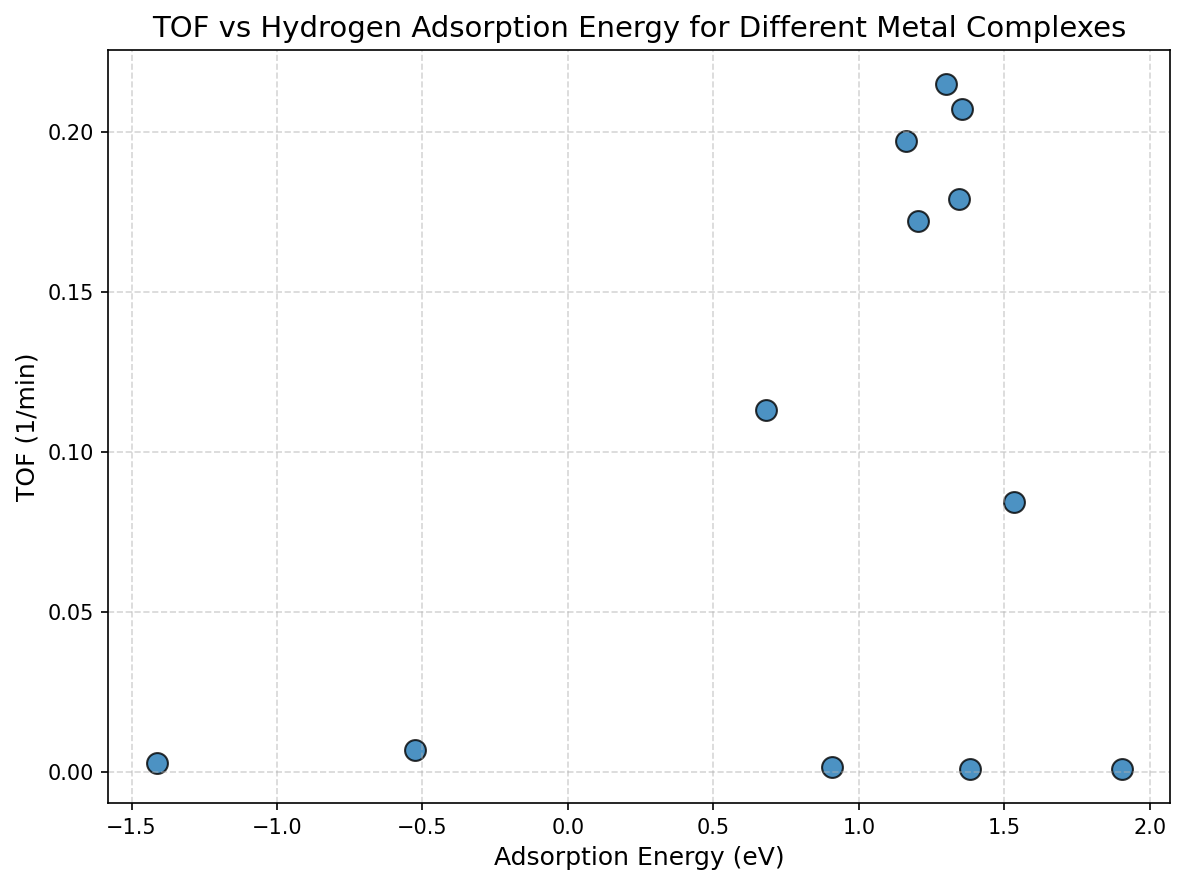

In [185]:
import matplotlib.pyplot as plt

# --- Prepare data ---
ligands = list(adsorption_energies.keys())
x = [adsorption_energies[l] for l in ligands]  # Adsorption energy (eV)
y = [tof[l] for l in ligands]                  # TOF (1/min)

# --- Create high-quality scatter plot ---
plt.figure(figsize=(8, 6), dpi=150)  # High resolution
plt.scatter(x, y, color='#1f77b4', s=100, edgecolors='k', alpha=0.8)  # Larger points with black edges

# Axes labels and title
plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("TOF (1/min)", fontsize=12)
plt.title("TOF vs Hydrogen Adsorption Energy for Different Metal Complexes", fontsize=14)

# Style
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()
